#### Load Packages

In [11]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

#### Load Datasets

In [25]:
df = pd.read_csv(r"C:\Users\Sree\Downloads\MSFT.csv")
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,233.759995,234.919998,231.149994,232.130005,229.908890,28357300
1,2022-11-01,234.600006,235.740005,227.330002,228.169998,225.986771,30592300
2,2022-11-02,229.460007,231.300003,220.039993,220.100006,217.994003,38407000


#### to datatime and set index

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)

In [27]:
df = df[['High','Close']]

#### Stationary checking

In [28]:
# H0: It is non stationary
# H1: It is stationary

def adf_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic','p-value','Lags used','Number of Observation Used']
    for value,label in zip(result,labels):
        print(label+ ' : '+str(value))
    if result[1]>=0.05:
        print('data is non-stationary')
    else:
        print("data is stationary")
        
print('Column : High')   
adf_test(df['High'])
print('cloumn : Close')
adf_test(df['Close'])

Column : High
ADF Test Statistic : -1.2071204989989917
p-value : 0.670525176859577
Lags used : 0
Number of Observation Used : 250
data is non-stationary
cloumn : Close
ADF Test Statistic : -1.4175043033962096
p-value : 0.5738561643647346
Lags used : 2
Number of Observation Used : 248
data is non-stationary


#### Model

In [29]:
#Specify the order of the VARMA Model (p,q)
p = 2 #order of autoregressive 
q = 1 #order of moving average

#create model
model = VARMAX(df,order = (p,q))

# Fit the model
results = model.fit()
results.summary()

Dep. Variable:,"['High', 'Close']",No. Observations:,251
Model:,"VARMA(2,1)",Log Likelihood,-1300.174
,+ intercept,AIC,2634.347
Date:,"Fri, 17 Nov 2023",BIC,2694.280
Time:,22:31:01,HQIC,2658.466
Sample:,0,,
,- 251,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.06, 0.00",Jarque-Bera (JB):,"199.86, 103.98"
Prob(Q):,"0.81, 0.99",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.82, 1.48",Skew:,"1.18, -1.30"


#### Prediction

In [30]:
# make forecast
forecast_steps = 5
forecast = results.forecast(steps = forecast_steps)
forecast

,High,Close
251,341.318647,338.217622
252,341.009762,337.319762
253,340.396313,336.753011
254,339.970099,336.401677
255,339.601223,336.040644


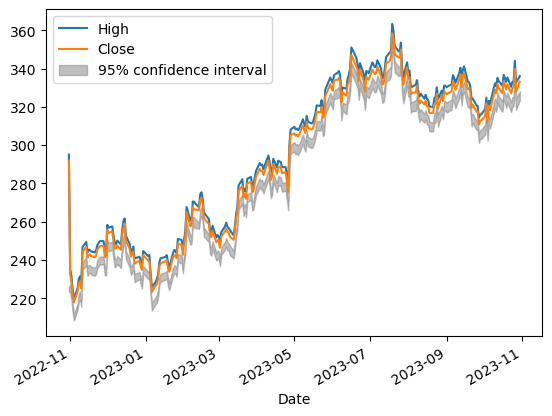

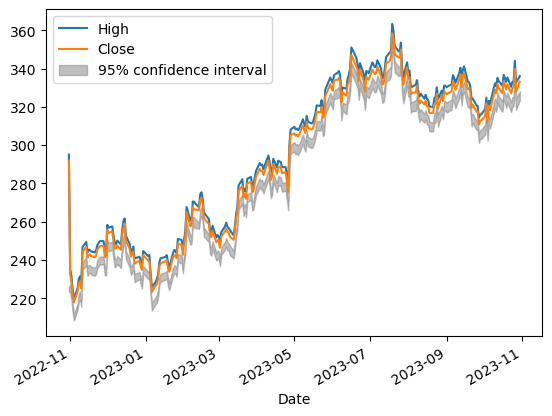

In [31]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(results)